<a href="https://colab.research.google.com/github/thatswhatmeetcoded/Sentiment-Classification/blob/main/decision_tree/6_model_training_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Decision Tree using TF-IDF
Accuracy: 0.5769230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        36
           1       0.50      0.71      0.59        28
           2       0.66      0.53      0.58        40

    accuracy                           0.58       104
   macro avg       0.58      0.59      0.58       104
weighted avg       0.59      0.58      0.58       104



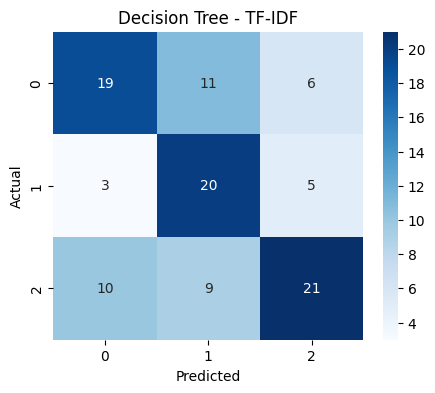

Saved: /content/drive/MyDrive/models/decision_tree_tf-idf.pkl

Decision Tree using BoW
Accuracy: 0.5769230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59        36
           1       0.50      0.50      0.50        28
           2       0.63      0.60      0.62        40

    accuracy                           0.58       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.58      0.58      0.58       104



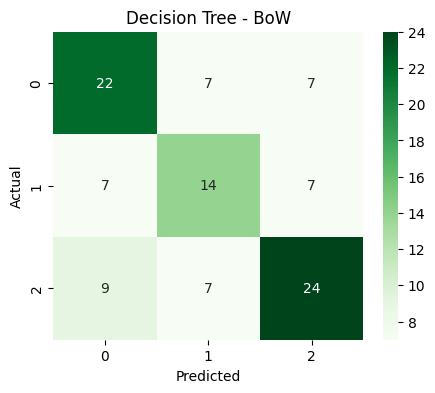

Saved: /content/drive/MyDrive/models/decision_tree_bow.pkl

Random Forest using TF-IDF
Accuracy: 0.5769230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        36
           1       0.44      0.79      0.56        28
           2       0.79      0.55      0.65        40

    accuracy                           0.58       104
   macro avg       0.61      0.59      0.58       104
weighted avg       0.63      0.58      0.58       104



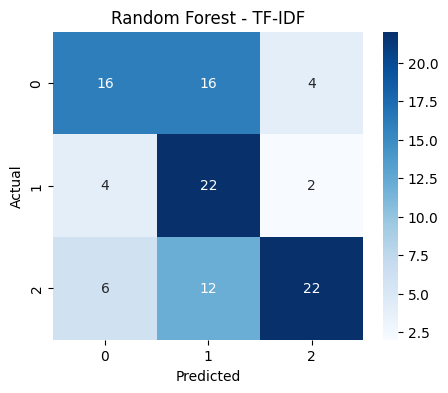

Saved: /content/drive/MyDrive/models/random_forest_tf-idf.pkl

Random Forest using BoW
Accuracy: 0.6826923076923077
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        36
           1       0.71      0.61      0.65        28
           2       0.67      0.75      0.71        40

    accuracy                           0.68       104
   macro avg       0.69      0.67      0.68       104
weighted avg       0.68      0.68      0.68       104



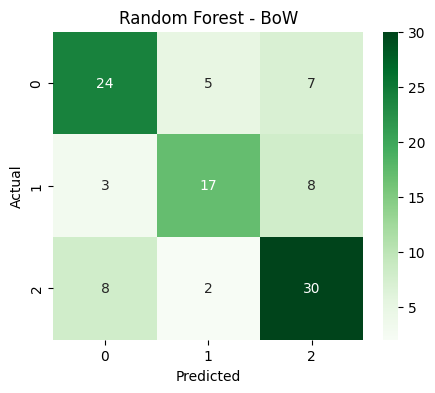

Saved: /content/drive/MyDrive/models/random_forest_bow.pkl



In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
pca_dir = '/content/drive/MyDrive/pca_data'
label_dir = '/content/drive/MyDrive/split_data'
model_dir = '/content/drive/MyDrive/models'
os.makedirs(model_dir, exist_ok=True)

# Load reduced TF-IDF and BoW features
X_tfidf_train = np.load(f"{pca_dir}/X_tfidf_train_reduced.npy")
X_tfidf_test = np.load(f"{pca_dir}/X_tfidf_test_reduced.npy")
X_bow_train = np.load(f"{pca_dir}/X_bow_train_reduced.npy")
X_bow_test = np.load(f"{pca_dir}/X_bow_test_reduced.npy")

# Load labels
y_tfidf_train = np.load(f"{label_dir}/y_tfidf_train.npy")
y_tfidf_test = np.load(f"{label_dir}/y_tfidf_test.npy")
y_bow_train = np.load(f"{label_dir}/y_bow_train.npy")
y_bow_test = np.load(f"{label_dir}/y_bow_test.npy")


# Define helper for training & evaluating
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_type, color='Blues'):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} using {feature_type}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=color)
    plt.title(f"{model_name} - {feature_type}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save model
    filename = f"{model_dir}/{model_name.lower().replace(' ', '_')}_{feature_type.lower()}.pkl"
    joblib.dump(model, filename)
    print(f"Saved: {filename}\n")

# Models to use
models = [
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
]

# Evaluate on both TF-IDF and BoW
for model, name in models:
    train_evaluate_model(model, X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test, name, "TF-IDF", color='Blues')
    train_evaluate_model(model, X_bow_train, X_bow_test, y_bow_train, y_bow_test, name, "BoW", color='Greens')


From our model evaluations, it is evident that Bag-of-Words (BoW) features outperform TF-IDF features in this sentiment classification task, particularly when paired with a Random Forest classifier. This may be attributed to the nature of our dataset — where common sentiment-indicative words (e.g., good, bad, love, hate) are crucial for classification. TF-IDF tends to down-weight these frequent terms, which can reduce their impact on model performance.

On the other hand, Random Forest classifiers consistently outperform Decision Trees due to their ensemble learning approach. By aggregating predictions from multiple decision trees, Random Forest reduces overfitting and improves generalization.

Thus, the best overall performance was achieved using BoW features with a Random Forest classifier, making it the recommended setup for this sentiment analysis task based on our current dataset.

